# Example notebook using the event display for PointNet datasets

This notebook uses the PointNet dataset to plots example events in 3D, corresponding to the 3D event data provided to the PointNet network.

## Imports and setup

First change some display settings for the notebook

In [1]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

External imports:

In [2]:
import sys
import matplotlib

Import WatChMaL analysis code

In [3]:
# either add WatChMaL repository directory to PYTHONPATH environment variable or add it here
sys.path.append('/home/nprouse/WatChMaL/WatChMaL')

In [4]:
from analysis.event_display.pointnet_event_display import PointNetEventDisplay

Imported analysis code from WatChMaL repository with git version: e8116d5


## Set up event display with dataset

The `PointNetEventDisplay` initialiser is the same as the `PointNetDataset` initialiser:

In [5]:
help(PointNetEventDisplay.__init__)

Help on function __init__ in module watchmal.dataset.pointnet.pointnet_dataset:

__init__(self, h5file, geometry_file, is_distributed, use_times=True, use_orientations=False, n_points=4000, transforms=None)
    Args:
        h5_path             ... path to h5 dataset file
        is_distributed      ... whether running in multiprocessing mode
        transforms          ... transforms to apply



Create an instance:

In [6]:
event_display = PointNetEventDisplay(h5file='/fast_scratch/WatChMaL/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5',
                                     geometry_file='/fast_scratch/WatChMaL/data/geometries/geo_mPMTshort.npz',
                                     is_distributed=False)

## Set up plotting style

Set the notebook's embedded figure format

In [7]:
%config InlineBackend.figure_formats = ['png']

Set some default matplotlib style settings

In [8]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (15, 12)
matplotlib.rcParams["figure.autolayout"] = True

## Display events

The 3D event display plots exactly the data produced by the Dataset class and passed to PointNet. How to use it:

In [9]:
help(PointNetEventDisplay.plot_event_3d)

Help on function plot_event_3d in module analysis.event_display.pointnet_event_display:

plot_event_3d(self, event, data_channel=-1, **kwargs)
    Plots an event as a 3D event-display-like image.
    
    Parameters
    ----------
    event : int
        index of the event to plot
    data_channel : int, default: -1
        The channel of the data used as the colours of the points. By default, channel -1 is used (i.e. the last
        channel of the data, usually charge or time). If set to None, each point is plotted with the same colour
        (gray by default unless color_map is set in kwargs).
    kwargs : optional
        Additional arguments to pass to `analysis.event_display.plot_event_3d`
        Valid arguments are:
        fig_size : (float, float), optional
            Size of the figure
        zoom : float, default: 1.4
            Zoom factor to enlarge the 3D drawing
        title : str, default: None
            Title of the plot
        style : str, optional
          

For example, plotting event number 8 in both default and `dark_background` matplotlib styles:

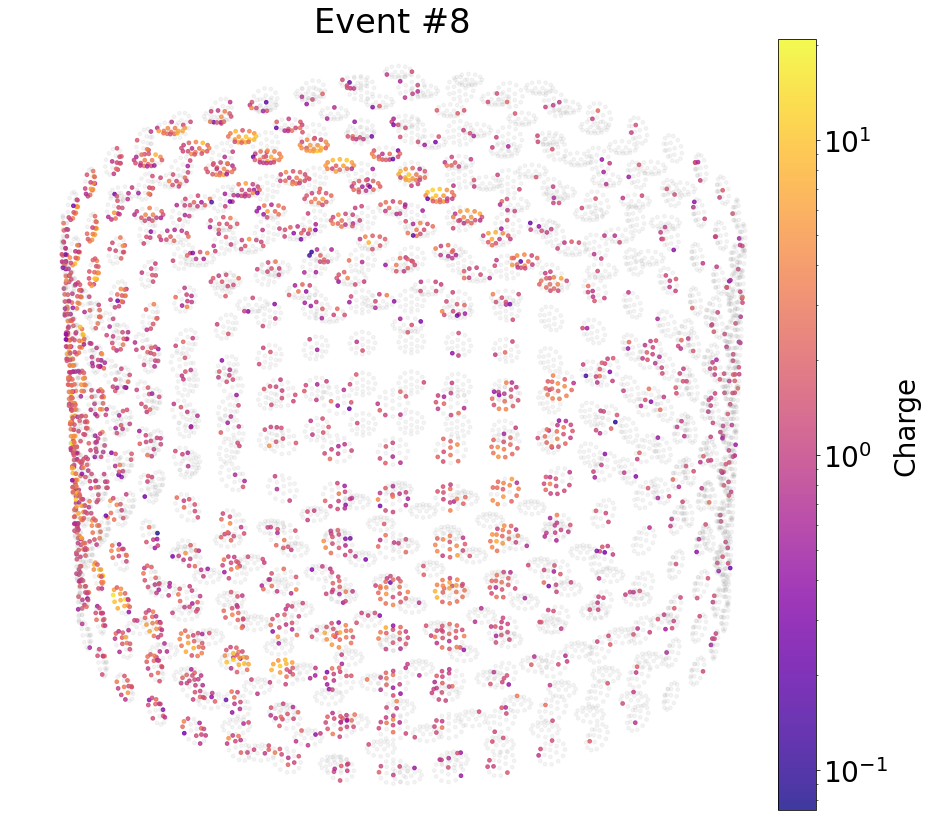

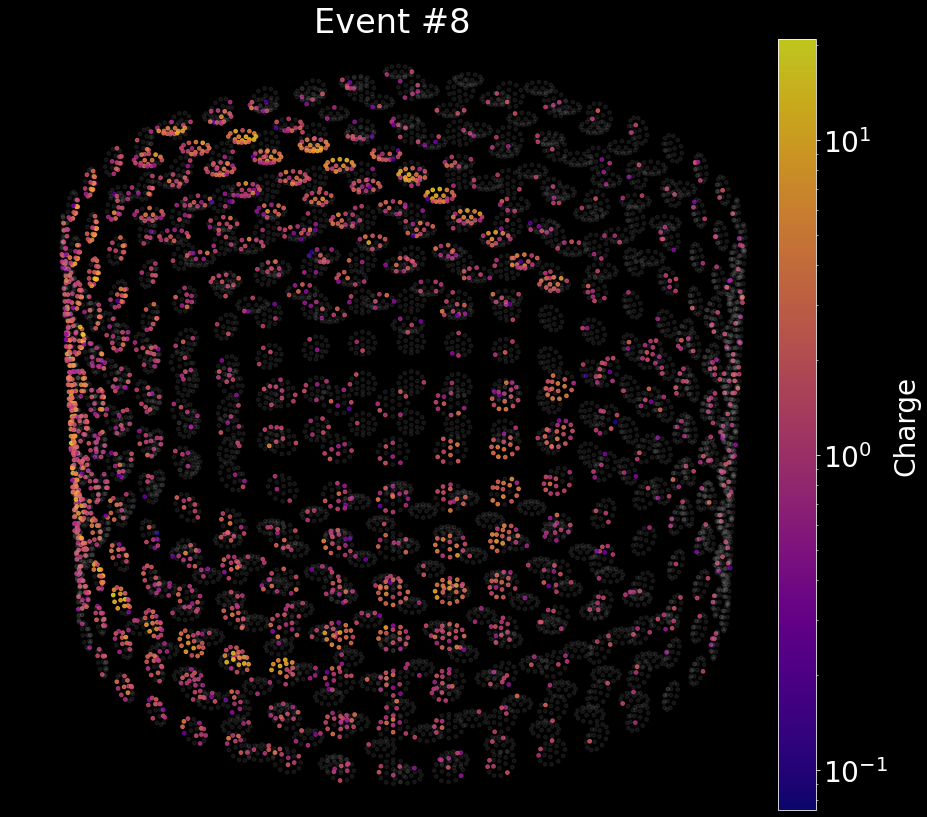

In [11]:
event_id_to_plot = 8
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30)
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30, style="dark_background")

## Using the HK Hybrid geometry instead

The version of the dataset used here only uses the 20" PMTs, so only those PMTs are shown. If using instead the version of the dataset designed for both 20" PMTs and mPMTs, using the corresponding data files, should display points for both PMT types.

In [12]:
event_display = PointNetEventDisplay(h5file='/fast_scratch/WatChMaL/data/HKHybrid/e-mu-pi0_wo_mpmts_rename.hdf5',
                                     geometry_file='/fast_scratch/WatChMaL/data/HKHybrid/HKHybrid_wo_mpmts.geo.npz',
                                     is_distributed=False)

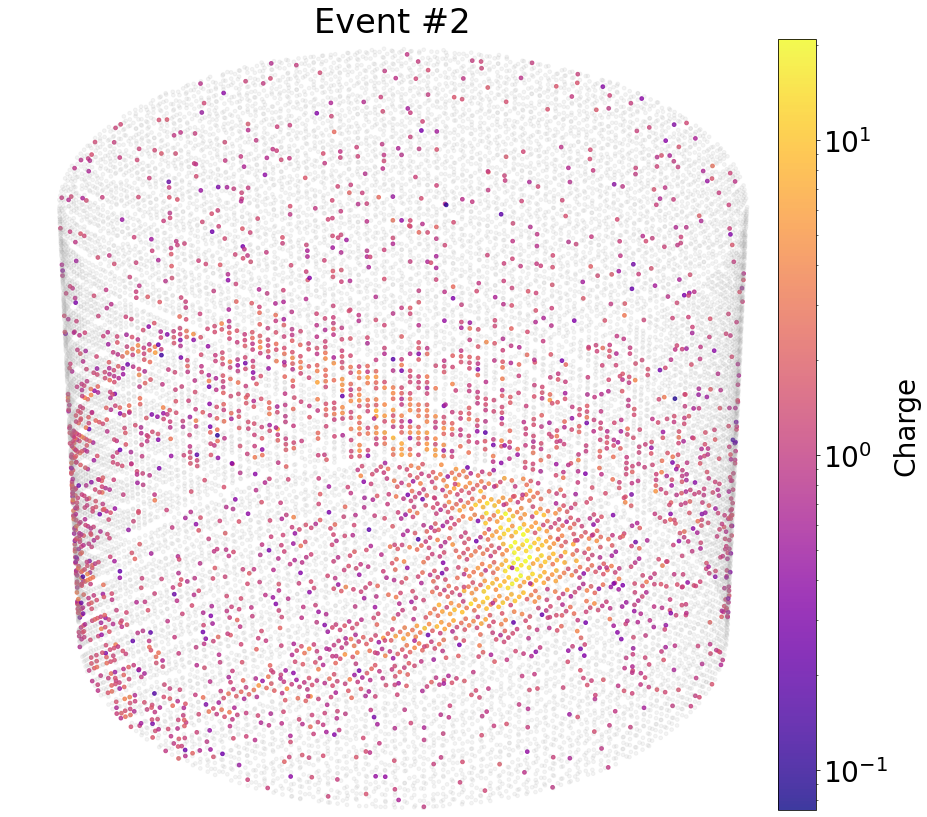

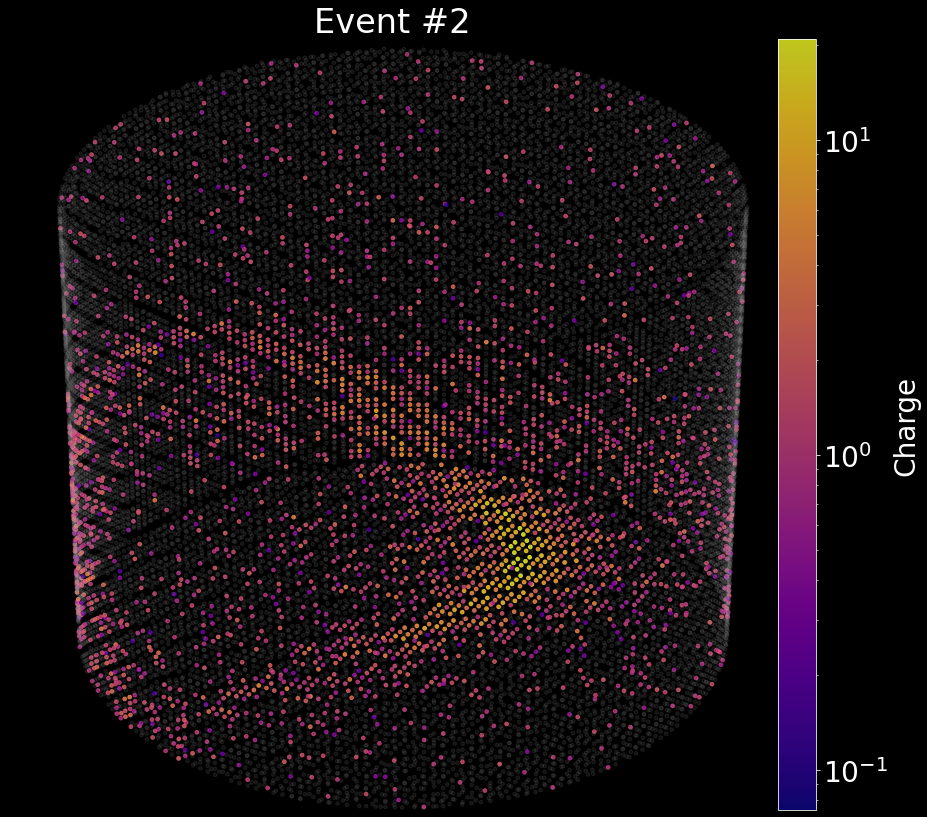

In [13]:
event_id_to_plot = 2
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", vertical_axis='z', view_azimuth=120, view_elevation=30)
fig, ax = event_display.plot_event_3d(event_id_to_plot, color_label="Charge", title=f"Event #{event_id_to_plot}", vertical_axis='z', view_azimuth=120, view_elevation=30, style="dark_background")